Lab 2: Intro to Neural Nets
===============

2/14/24, CS 6120 Natural Language Processing\
Complete in groups of up to 3.\
Please indicate your partners on the Gradescope submission. Due Fri 2/16, 11:59 PM.

-------
version 1: Fall 2023, Felix Muzny\
version 2: Spring 2024, Raj Venkat - modified training of NN from scratch to include MSE, gradients computed using computational graphs

Task 0: Group Member Names:
-----------------
1. Bhuvan Karthik Channagiri  
2. Nikita Mandal    
3. Vaibhav Kejriwal

Task 1: Writing a neural net from scratch
-----------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# seed random number generation so that you can
# track the same numbers as each other
np.random.seed(42)

In [2]:
def sigmoid(x: float) -> float:
    """
    Apply the sigmoid function to the passed-in value.
    Parameters:
        x - float value to pass through sigmoid
    Return:
    float in [0, 1]
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x: float) -> float:
    """
    Apply the derivative of the sigmoid function
    sigmoid(x) * (1 - sigmoid(x))
    to the passed-in value.
    Parameters:
        x - float value to pass through sigmoid derivative
    Return:
    float result
    """
    return sigmoid(x) * (1 - sigmoid(x))

In [3]:
# input dataset
# 3rd "feature" is the bias term
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])

# labels, transposed so that they match
# easily with our inputs X
# the first label matches the first row in our input data,
# the second label matches the second row in our input data, etc
# .T gets the transpose for us, which makes
# matrix math easier later
y = np.array([[0,1,1,0]]).T

1. What logical function (AND, OR, etc) does this dataset represent? (remember that this function should apply to two inputs (our two input features and produce the matching label)

Ans: It represents the XOR logical function.

In [4]:
hidden_units = 4
input_features = X.shape[1]

# TODO: fill in dimensions here for W
# Fill these in as a tuple like (rows, columns)
# This corresponds to how shapes are represented for numpy arrays

W_dim = (input_features, hidden_units)

# Initialize weights W randomly with mean 0 and range [-1, 1]
# Use W_dim to produce the correct number of random numbers

W = np.random.uniform(-1, 1, W_dim)

# Similarly, fill in dimensions for U
# Note that since we are doing binary classification, the second dimension here should be 1
# (corresponding to one output unit)

U_dim = (hidden_units, 1)

# Initialize weights U randomly with mean 0 and range [-1, 1]
# Use U_dim to produce the correct number of random numbers

U = np.random.uniform(-1, 1, U_dim)

print("W:", W)
print("U:", U)

# TRAINING LOOP

inputs = X
learning_rate=0.01
num_epochs = 100  # Play around with this

for i in range(num_epochs):
    # forward propagation — using sigmoid

    h = sigmoid(np.dot(inputs,W))

    # note that this gives us the classification for every input
    # example simultaneously

    y_hat = sigmoid(np.dot(h,U))

    error = (y - y_hat)

    loss = np.mean(error ** 2) # FILL IN THE CODE TO COMPUTE THE MEAN SQUARED ERROR LOSS

    # Fill in computations for the gradients below. Deduce the formula for the gradients
    # by drawing a computation graph (you don't need to submit the graph)

    grad_loss_mse_U = np.dot(h.T, error * sigmoid_deriv(y_hat))# FILL ME IN
    grad_loss_mse_W = np.dot(inputs.T, np.dot(error * sigmoid_deriv(y_hat), U.T) * sigmoid_deriv(h))# FILL ME IN

    # In the lines below, you may need to transpose some matrices

    W = W - learning_rate * grad_loss_mse_W
    U = U - learning_rate * grad_loss_mse_U

    if i % 10 == 0:
        print(f'Epoch {i}, Loss: {loss}')

print("Updated W:", W)
print("Updated U:", U)

W: [[-0.25091976  0.90142861  0.46398788  0.19731697]
 [-0.68796272 -0.68801096 -0.88383278  0.73235229]
 [ 0.20223002  0.41614516 -0.95883101  0.9398197 ]]
U: [[ 0.66488528]
 [-0.57532178]
 [-0.63635007]
 [-0.63319098]]
Epoch 0, Loss: 0.2817889399227034
Epoch 10, Loss: 0.2836173417103767
Epoch 20, Loss: 0.2855429618593159
Epoch 30, Loss: 0.28756938974584956
Epoch 40, Loss: 0.2897001389991346
Epoch 50, Loss: 0.29193861439643004
Epoch 60, Loss: 0.29428807532092227
Epoch 70, Loss: 0.2967515957669625
Epoch 80, Loss: 0.29933202094390293
Epoch 90, Loss: 0.3020319206087082
Updated W: [[-0.26700583  0.91619158  0.48154705  0.2149686 ]
 [-0.70244192 -0.67275331 -0.86776271  0.74695849]
 [ 0.17282266  0.444371   -0.92694725  0.9697393 ]]
Updated U: [[ 0.58131536]
 [-0.69687905]
 [-0.69209191]
 [-0.79272875]]


2. Does the hidden layer have a bias term in this neural net? __NO, here the hidden layer does not have a bias term explicitly as in this Neural network the bias term is in the input layer  only.__
3. What variables' values are updated as the loop above iterates? __The variables that are updated in the loop are the two sets of weights, one which is between the input layer and hidden layer, represented by **(W)** and the other one between the hidden layer and the output layer,represented by **(U)**. In the learning process we aim to minimize the loss by adjusting these weights. By minimizing the loss the model performance can be improved. This can also be called Backward Propogation in other terms__

In [11]:
print("Output After Training:")

# These are the same as the inputs that we trained this net on
test_inputs = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
gold_labels = np.array([[0,1,1,0]]).T

# Initialize weights randomly
np.random.seed(0)
W = 2 * np.random.random((3, 4)) - 1
U = 2 * np.random.random((4, 1)) - 1

# Training parameters
learning_rate = 0.5
num_epochs = 2000

# Training loop
for epoch in range(num_epochs):
    # Forward propagation
    h = sigmoid(np.dot(X, W))
    y_hat = sigmoid(np.dot(h, U))

    # Backpropagation
    error = y - y_hat
    dU = np.dot(h.T, error * sigmoid_deriv(y_hat))
    dW = np.dot(X.T, np.dot(error * sigmoid_deriv(y_hat), U.T) * sigmoid_deriv(h))

    # Update weights
    U += learning_rate * dU
    W += learning_rate * dW

    # Compute and print loss
    loss = np.mean((y - y_hat) ** 2)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Test the trained model
test_inputs = np.array([[0, 0, 1],
                        [0, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])

h_test = sigmoid(np.dot(test_inputs, W))
y_pred = sigmoid(np.dot(h_test, U))

print("Predicted probabilities:", y_pred)
print("Predicted labels:", [1 if val > 0.5 else 0 for val in y_pred])

# Test the model after training
h_test = sigmoid(np.dot(test_inputs, W))
y_pred = sigmoid(np.dot(h_test, U))

print("\nPredicted probabilities:", y_pred)
print("Predicted labels:", [1 if val > 0.5 else 0 for val in y_pred])
print("Actual labels:", y.T)
print("Actual labels:", gold_labels.T)
print("Assigned probabilities:", y_hat)
print("Assigned labels:", [1 if y_hat_val > .5 else 0 for y_hat_val in y_hat])

Output After Training:
Epoch 0, Loss: 0.2661199320226466
Epoch 100, Loss: 0.24975095281828957
Epoch 200, Loss: 0.24960796645186184
Epoch 300, Loss: 0.24946288721328233
Epoch 400, Loss: 0.24930086926250977
Epoch 500, Loss: 0.24910994772142533
Epoch 600, Loss: 0.24887743580052007
Epoch 700, Loss: 0.2485874795256049
Epoch 800, Loss: 0.24821859719365916
Epoch 900, Loss: 0.2477404100196957
Epoch 1000, Loss: 0.24710869284402948
Epoch 1100, Loss: 0.24625746210462884
Epoch 1200, Loss: 0.24508601217606268
Epoch 1300, Loss: 0.24343748287501565
Epoch 1400, Loss: 0.2410637020376533
Epoch 1500, Loss: 0.23756957364699488
Epoch 1600, Loss: 0.23233309827324544
Epoch 1700, Loss: 0.22441603016775857
Epoch 1800, Loss: 0.21253937770402806
Epoch 1900, Loss: 0.1953153478198205
Predicted probabilities: [[0.38844237]
 [0.58102369]
 [0.56983453]
 [0.42021627]]
Predicted labels: [0, 1, 1, 0]

Predicted probabilities: [[0.38844237]
 [0.58102369]
 [0.56983453]
 [0.42021627]]
Predicted labels: [0, 1, 1, 0]
Actual 

4. How many iterations did you need for the predicted values $\hat y$ to match the actual values? __The number of iterations needed was 2000__
5. Make a graph of how the `layer2_error` changes as epochs progress.

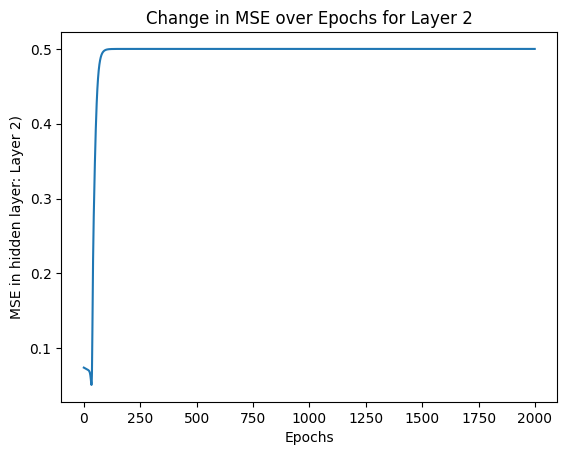

In [12]:
hidden_layer_errors = []

#using same num of epochs
for epoch in range(num_epochs):
    # Forward propagation
    h = sigmoid(np.dot(inputs, W))
    y_hat = sigmoid(np.dot(h, U))

    error = y - y_hat

    # Mean Squared Error Loss
    loss = np.mean(error**2)

    # Append the error to the list
    hidden_layer_errors.append(np.mean((h - y_hat)**2))

    # Gradients
    grad_loss_mse_U = np.dot(h.T, error * sigmoid_deriv(y_hat))
    grad_loss_mse_W = np.dot(inputs.T, np.dot(error * sigmoid_deriv(y_hat), U.T) * sigmoid_deriv(h))

    # Update weights
    U = U - learning_rate * grad_loss_mse_U
    W = W - learning_rate * grad_loss_mse_W

# Plotting the error over epochs
plt.plot(range(num_epochs), hidden_layer_errors)
plt.xlabel('Epochs')
plt.ylabel('MSE in hidden layer: Layer 2)')
plt.title('Change in MSE over Epochs for Layer 2')
plt.show()

Task 2: Neural Nets from libraries (you'll be doing a similar thing in your sentiment analysis HW!)
----------------

Now, we'll take a look at some common libraries used to create classifiers using neural nets. We'll take a look at [`keras`](https://keras.io/) which provides a nice API for implementing neural nets and can be run on top of TensorFlow, CNTK, or Theano. We'll look at an example using [`tensorflow`](https://github.com/tensorflow/tensorflow) as our backend.

Installation of component libraries:

```
pip3 install tensorflow
sudo pip3 install keras
```

If you are working on a Silicon chip Mac (Macs with M1 and M2 chips), you'll need at least OS 12.0+ (Monterey (12) or Ventura (13)), then you'll want to follow the [instructions on the Apple developers website](https://developer.apple.com/metal/tensorflow-plugin/). We will be using tensorflow/keras going forward, so this is worth doing on your own outside of class!

In the meantime, you can also upload this notebook to [Google colaboratory](https://colab.research.google.com/) and run this portion on the cloud.

In [13]:
# Uncomment these lines of code to do the import. Left
# commented because on Macs with unsupported architecture, these
# imports will kill your kernel which is highly annoying.


# Sequential will be the base model we'll use
from keras.models import Sequential
# Dense layers are our base feed forward layers
from keras.layers import Dense

In [30]:
# set up the basis for a feed forward network
model = Sequential()

# same X and y as above
X = np.array([[0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
y = np.array([[0,1,1,0]]).T

# hidden layer
# you can play around with different activation functions
# W was (input_features, hidden_units)
model.add(Dense(units=4, activation='relu', input_dim=X.shape[1]))

# output layer
# activation function is our classification function
model.add(Dense(units=1, activation='sigmoid'))

# configure the learning process
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


# 1 epoch = once through the data
model.fit(X, y, epochs=450, verbose=1)

Epoch 1/450
1/1 [==============================] - 0s 386ms/step - loss: 0.7236 - accuracy: 0.2500
Epoch 2/450
1/1 [==============================] - 0s 10ms/step - loss: 0.7229 - accuracy: 0.2500
Epoch 3/450
1/1 [==============================] - 0s 6ms/step - loss: 0.7222 - accuracy: 0.2500
Epoch 4/450
1/1 [==============================] - 0s 6ms/step - loss: 0.7214 - accuracy: 0.2500
Epoch 5/450
1/1 [==============================] - 0s 6ms/step - loss: 0.7207 - accuracy: 0.2500
Epoch 6/450
1/1 [==============================] - 0s 5ms/step - loss: 0.7200 - accuracy: 0.2500
Epoch 7/450
1/1 [==============================] - 0s 6ms/step - loss: 0.7192 - accuracy: 0.2500
Epoch 8/450
1/1 [==============================] - 0s 8ms/step - loss: 0.7185 - accuracy: 0.2500
Epoch 9/450
1/1 [==============================] - 0s 9ms/step - loss: 0.7178 - accuracy: 0.2500
Epoch 10/450
1/1 [==============================] - 0s 7ms/step - loss: 0.7171 - accuracy: 0.2500
Epoch 11/450
1/1 [========

In [31]:
x_test = np.array([[0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
y_test = np.array([[0,1,1,0]]).T
labels = model.predict(x_test)
print("Assigned probabilities:", labels)
print("Assigned labels:", [1 if y_hat_val > .5 else 0 for y_hat_val in labels])

1/1 [==============================] - 0s 37ms/step
Assigned probabilities: [[0.34999427]
 [0.5415805 ]
 [0.5416816 ]
 [0.4129878 ]]
Assigned labels: [0, 1, 1, 0]


6. How many epochs did you need for 100% accuracy? __We trained the model for 450 Epochs but we gained 100% accuracy at the 93rd Epoch__

Interested in getting deeper into neural nets?


Here are two places to start from:
- take a look at the data that you can load from [`nltk`](https://www.nltk.org/data.html) and [`scikit-learn`](https://scikit-learn.org/stable/datasets/index.html#dataset-loading-utilities), then work on creating a neural net to do either binary or multinomial classification
- take a look at the tensorflow + keras word embeddings tutorial [here](https://www.tensorflow.org/tutorials/text/word_embeddings). Note! This tutorial mentions RNNs, which are special kind of neural net (they are not the feedforward architecture that we've seen so far). We'll get into RNNs after next week.